In [1]:
# All the imports needed

# Data Manipulation
import numpy as np 
import pandas as pd 

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Scaling
from sklearn.preprocessing import StandardScaler

#Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



In [2]:
student = pd.read_csv('C:/Users/cheta/Downloads/VIT7/tarp-projet/xAPI-Edu-Data.csv')

In [3]:
# Checking the head of the data (First 5 rows)
student.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [4]:
# Show null counts and data types
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    1212 non-null   object
 1   NationalITy               1212 non-null   object
 2   PlaceofBirth              1212 non-null   object
 3   StageID                   1212 non-null   object
 4   GradeID                   1212 non-null   object
 5   SectionID                 1212 non-null   object
 6   Topic                     1212 non-null   object
 7   Semester                  1212 non-null   object
 8   Relation                  1212 non-null   object
 9   raisedhands               1212 non-null   int64 
 10  VisITedResources          1212 non-null   int64 
 11  AnnouncementsView         1212 non-null   int64 
 12  Discussion                1212 non-null   int64 
 13  ParentAnsweringSurvey     1212 non-null   object
 14  ParentschoolSatisfaction

# Exploring the data

<Axes: xlabel='Class', ylabel='count'>

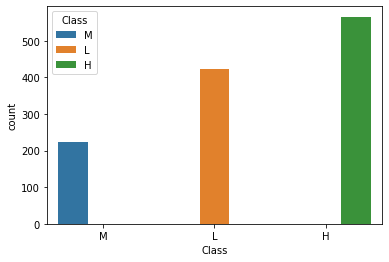

In [5]:
# Count of students of each class

# Create the count plot
sns.countplot(data=student, x='Class', hue='Class')

<Axes: xlabel='Class', ylabel='count'>

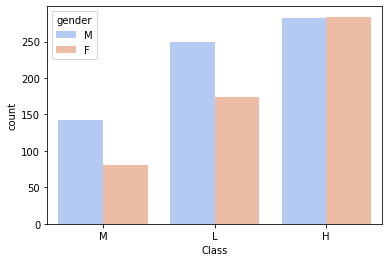

In [6]:
# Student class by gender
sns.countplot(x='Class',hue='gender',data=student,palette='coolwarm')

c:\Users\cheta\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


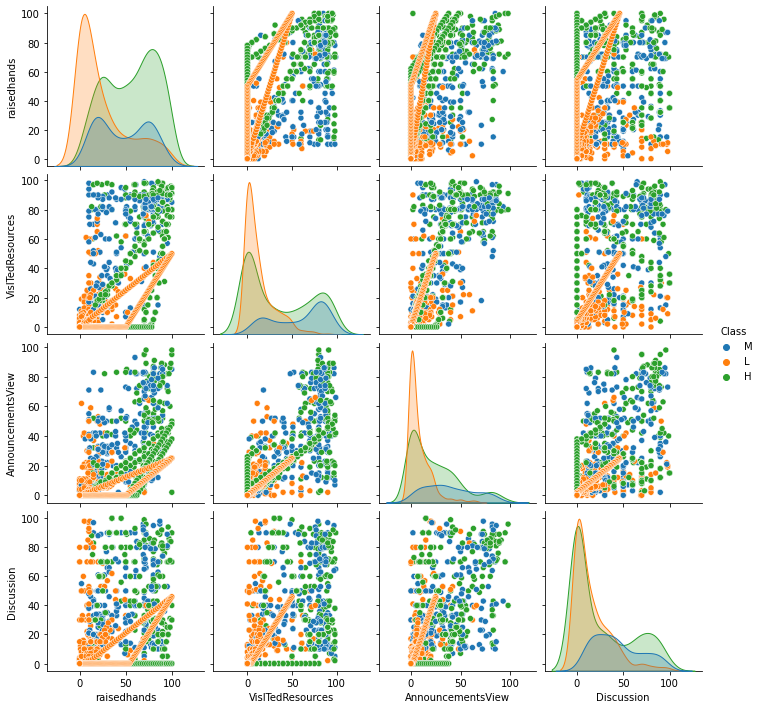

In [7]:
# Countplot based on the student Class
sns.pairplot(student,hue='Class')

# Feature Engineering

In [8]:
# Replacing categorical values to numerical

student['gender'].replace('M', 0,inplace=True)
student['gender'].replace('F', 1,inplace=True)

# Or we can use get_dummies to convert categorical values and concatenate them later
nat = pd.get_dummies(student['NationalITy'])
gid = pd.get_dummies(student['GradeID'])
topic = pd.get_dummies(student['Topic'])
semester = pd.get_dummies(student['Semester'])
rh = pd.get_dummies(student['raisedhands'])
av = pd.get_dummies(student['AnnouncementsView'])
des = pd.get_dummies(student['Discussion'])
sab = pd.get_dummies(student['StudentAbsenceDays'])
vr = pd.get_dummies(student['VisITedResources'])


In [9]:
#Drop useless columns & columns we need to replace with variables above
student.drop(['PlaceofBirth','PlaceofBirth','StageID','SectionID','Relation','ParentAnsweringSurvey','ParentschoolSatisfaction'],axis=1,inplace=True)

In [10]:
student.head()

,gender,NationalITy,GradeID,Topic,Semester,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
0,0,KW,G-04,IT,F,15,16,2,20,Under-7,M
1,0,KW,G-04,IT,F,20,20,3,25,Under-7,M
2,0,KW,G-04,IT,F,10,7,0,30,Above-7,L
3,0,KW,G-04,IT,F,30,25,5,35,Above-7,L
4,0,KW,G-04,IT,F,40,50,12,50,Above-7,M


In [11]:
# Concatenating the variables we created above 
student = pd.concat([student,nat,gid,topic,semester,rh,av,des,vr,sab],axis=1)

# Feature selection

In [12]:
# Check all the columns
student.columns

Index([            'gender',        'NationalITy',            'GradeID',
                    'Topic',           'Semester',        'raisedhands',
         'VisITedResources',  'AnnouncementsView',         'Discussion',
       'StudentAbsenceDays',
       ...
                         92,                   93,                   94,
                         95,                   96,                   97,
                         98,                   99,            'Above-7',
                  'Under-7'],
      dtype='object', length=437)

In [13]:
Label = student['Class'] # Class is the value we want to predict

Features = student[['gender', 'raisedhands', 'VisITedResources', 'AnnouncementsView',
       'Discussion']]


# We can also use the following method

#Features = student.drop(['feature a','feature b' .... 'feature n'],axis=1)

# Scaling the data

In [14]:
#Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaler.fit(Features)
scaled = scaler.transform(Features)

# Train Test Split

In [15]:
X = scaled
y = Label
# split the data to 20% test,80% train with random state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Training Models

# Random Forest Classifier

### Finding best number of estimators

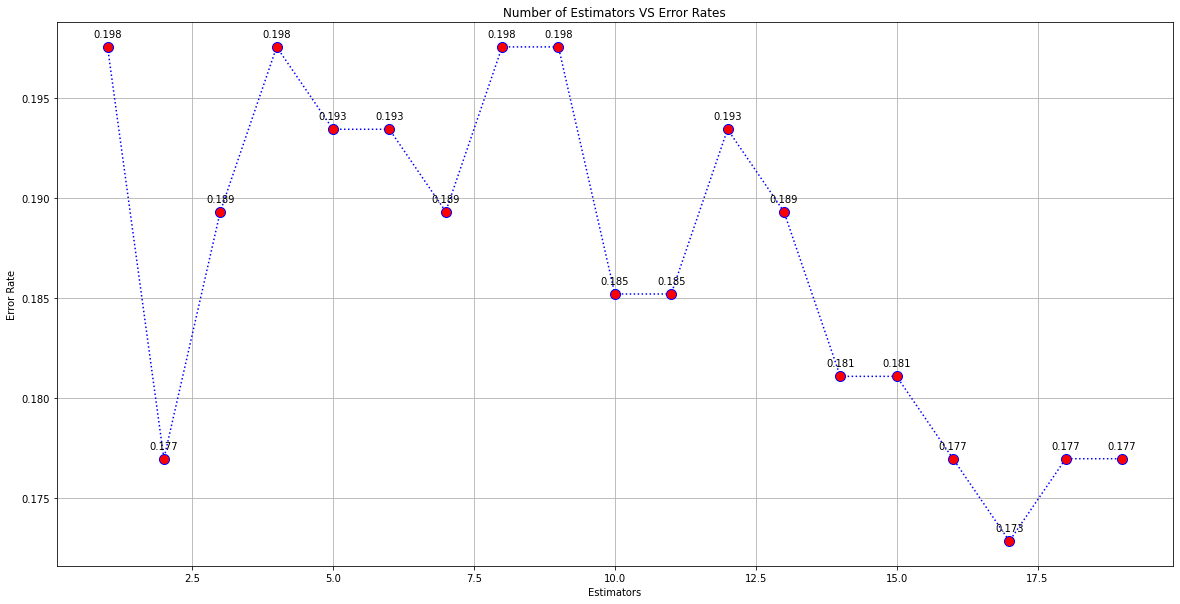

In [16]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

err = []  # Array to save all error rates

for i in range(1, 20):  # Loop to try all error rates from 1 to 40
    rfe = RandomForestClassifier(n_estimators=i * 10, random_state=42)  # Create rfc with number of estimators with value i*10
    rfe.fit(X_train, y_train)  # Fit the model
    errpred = rfe.predict(X_test)  # Predict the value
    err.append(np.mean(errpred != y_test))  # Add the value to the array

# Plotting the value of estimators error rate using the method we created above to make it easier to choose an estimator value
plt.figure(figsize=(20, 10))  # Size of the figure
plt.plot(range(1, 20), err, color='blue', linestyle='dotted', marker='o', markerfacecolor='red', markersize=10)  # plotting the values
plt.title('Number of Estimators VS Error Rates')  # title
plt.xlabel('Estimators')  # X label
plt.ylabel('Error Rate')  # Y label

# Adding labels and values to the data points
for i, txt in enumerate(err):
    plt.annotate(f'{txt:.3f}', (i + 1, err[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.grid(True)  # Add gridlines for better readability
plt.show()


### Training the model 

In [17]:
rfc = RandomForestClassifier(n_estimators=80,max_features='auto', max_depth=9,min_samples_leaf=1,
                             min_samples_split=2,bootstrap=True, random_state = 42)
rfc.fit(X_train,y_train)
rfcpred = rfc.predict(X_test)

c:\Users\cheta\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest Classifier

              precision    recall  f1-score   support

           H       0.83      0.90      0.87       118
           L       0.94      0.86      0.90        78
           M       0.67      0.64      0.65        47

    accuracy                           0.84       243
   macro avg       0.81      0.80      0.81       243
weighted avg       0.84      0.84      0.84       243



Confusion matrix


<Axes: >

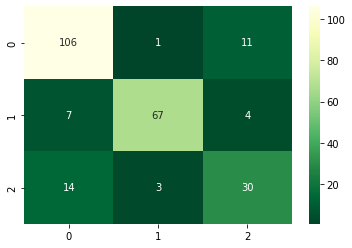

In [18]:
print('Random Forest Classifier' + '\n')
print(classification_report(y_test,rfcpred))

print('\n')

print('Confusion matrix')
sns.heatmap(confusion_matrix(y_test,rfcpred),cmap='YlGn_r',annot=True,fmt='g')

# Support Vector Classifier

In [19]:
svc = SVC(C=100,random_state=42,gamma=1)
svc.fit(X_train,y_train)
svcpred = svc.predict(X_test)

Support Vector Classifier

              precision    recall  f1-score   support

           H       0.81      0.87      0.84       118
           L       0.90      0.88      0.89        78
           M       0.59      0.49      0.53        47

    accuracy                           0.80       243
   macro avg       0.77      0.75      0.76       243
weighted avg       0.80      0.80      0.80       243



Confusion matrix


<Axes: >

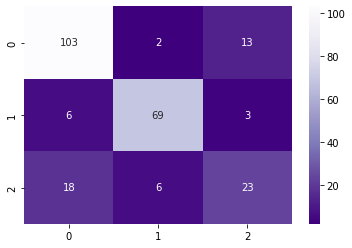

In [20]:
print('Support Vector Classifier' + '\n')
print(classification_report(y_test,svcpred))

print('\n')

print('Confusion matrix')
sns.heatmap(confusion_matrix(y_test,svcpred),cmap='Purples_r',annot=True,fmt='g')

# Desicion Tree Classifier

In [21]:
dt = DecisionTreeClassifier(max_depth=7, min_samples_split=4, min_samples_leaf=1, random_state=1)
dt.fit(X_train,y_train)
dtpred = dt.predict(X_test)

Desicion Tree Classifier

              precision    recall  f1-score   support

           H       0.85      0.88      0.86       118
           L       0.91      0.78      0.84        78
           M       0.57      0.64      0.60        47

    accuracy                           0.80       243
   macro avg       0.77      0.77      0.77       243
weighted avg       0.81      0.80      0.81       243



Confusion matrix


<Axes: >

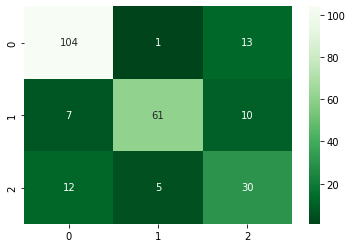

In [22]:
print('Desicion Tree Classifier' + '\n')
print(classification_report(y_test,dtpred))

print('\n')

print('Confusion matrix')
sns.heatmap(confusion_matrix(y_test,dtpred),cmap='Greens_r',annot=True,fmt='g')

# KNN classifier

### Choosing K value

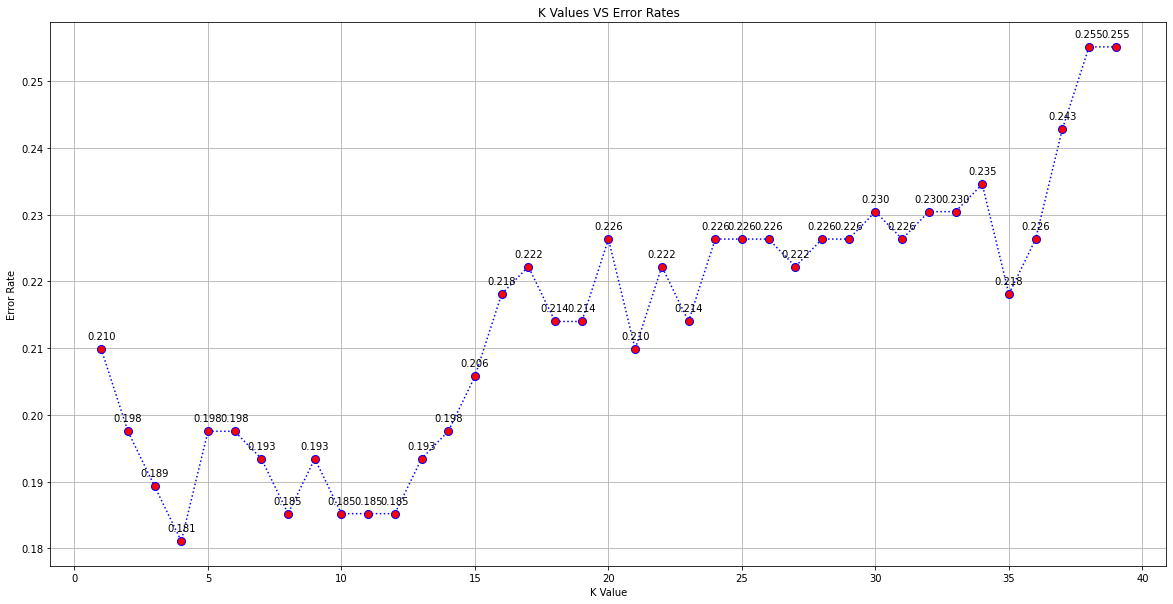

In [23]:
err_rate = []  # Array to save all error rates

for i in range(1, 40):  # loop to try all error rates from 1 to 40
    knn = KNeighborsClassifier(n_neighbors=i)  # create a knn object with number of neighbours with value i
    knn.fit(X_train, y_train)  # fit the model
    pred_i = knn.predict(X_test)  # predict the value
    err_rate.append(np.mean(pred_i != y_test))  # add the value to the array

# Plotting the value of k error rate using the method we created above to make it easier to choose a k value
plt.figure(figsize=(20, 10))  # size of the figure
plt.plot(range(1, 40), err_rate, color='blue', linestyle='dotted', marker='o', markerfacecolor='red', markersize=8)  # plotting the values
plt.title('K Values VS Error Rates')  # title
plt.xlabel('K Value')  # x label
plt.ylabel('Error Rate')  # y label

for i, txt in enumerate(err_rate):
    plt.annotate(f'{txt:.3f}', (i + 1, err_rate[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.grid(True)  # Add gridlines for better readability
plt.show()

### Training the model

In [24]:
# We didn't choose 1 as it's so sensetive to just rely on 1 neighbor
knn = KNeighborsClassifier(n_neighbors=21,p=10)
knn.fit(X_train,y_train)
knnpred = knn.predict(X_test)

K Nearest Neighbours

              precision    recall  f1-score   support

           H       0.78      0.87      0.82       118
           L       0.87      0.79      0.83        78
           M       0.60      0.51      0.55        47

    accuracy                           0.78       243
   macro avg       0.75      0.73      0.74       243
weighted avg       0.78      0.78      0.77       243



Confusion matrix


<Axes: >

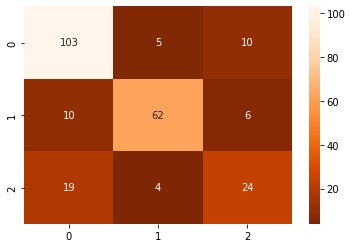

In [25]:
print('K Nearest Neighbours' + '\n')
print(classification_report(y_test,knnpred))

print('\n')

print('Confusion matrix')
sns.heatmap(confusion_matrix(y_test,knnpred),cmap='Oranges_r',annot=True,fmt='g')

# Logistic Regression 

In [26]:
Lr = LogisticRegression(C=1,max_iter=30,multi_class='auto',random_state=1)
Lr.fit(X_train,y_train)
Lrpred = Lr.predict(X_test)

Logistic Regression

              precision    recall  f1-score   support

           H       0.63      0.63      0.63       118
           L       0.61      0.65      0.63        78
           M       0.59      0.51      0.55        47

    accuracy                           0.61       243
   macro avg       0.61      0.60      0.60       243
weighted avg       0.61      0.61      0.61       243



Confusion matrix


<Axes: >

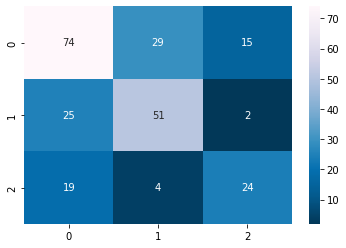

In [27]:
print('Logistic Regression' + '\n')
print(classification_report(y_test,Lrpred))

print('\n')

print('Confusion matrix')
sns.heatmap(confusion_matrix(y_test,Lrpred),cmap='PuBu_r',annot=True,fmt='g')

# Features importance

<Axes: >

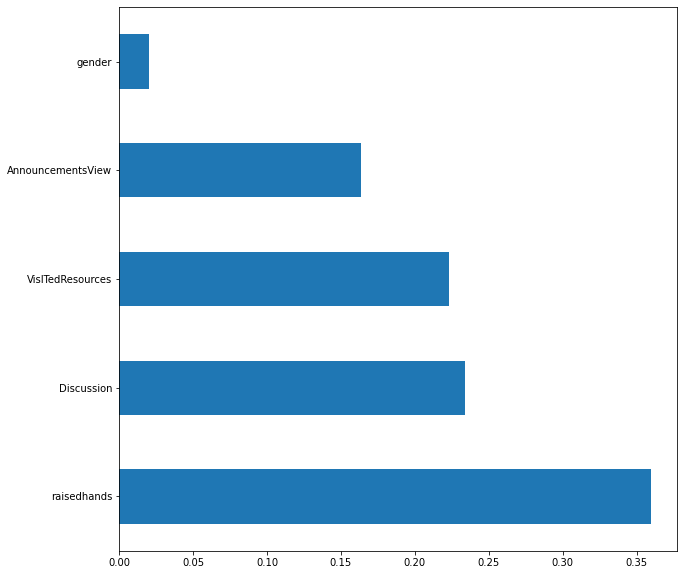

In [28]:
# Show which features has the most effect on our results so we can modify and tune our features
# I used Random Forest Classifier to determine the feature importances

plt.figure(figsize=(10,10))
importance = pd.Series(rfc.feature_importances_,index=Features.columns)
importance.nlargest(15).plot(kind='barh')

# Summary

### Here is a summary of best accuracy I could get from each model

#### Random Forest Classifier 84%
#### Support Vector Classifier 80%
#### Desicion Tree Classifier 80%
#### KNN 78%
#### Logistic Regression 61%